In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
sns.set()

In [3]:
df=pd.read_csv('xAPI-Edu-Data.csv')

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
df.shape

(480, 17)

In [9]:
df.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

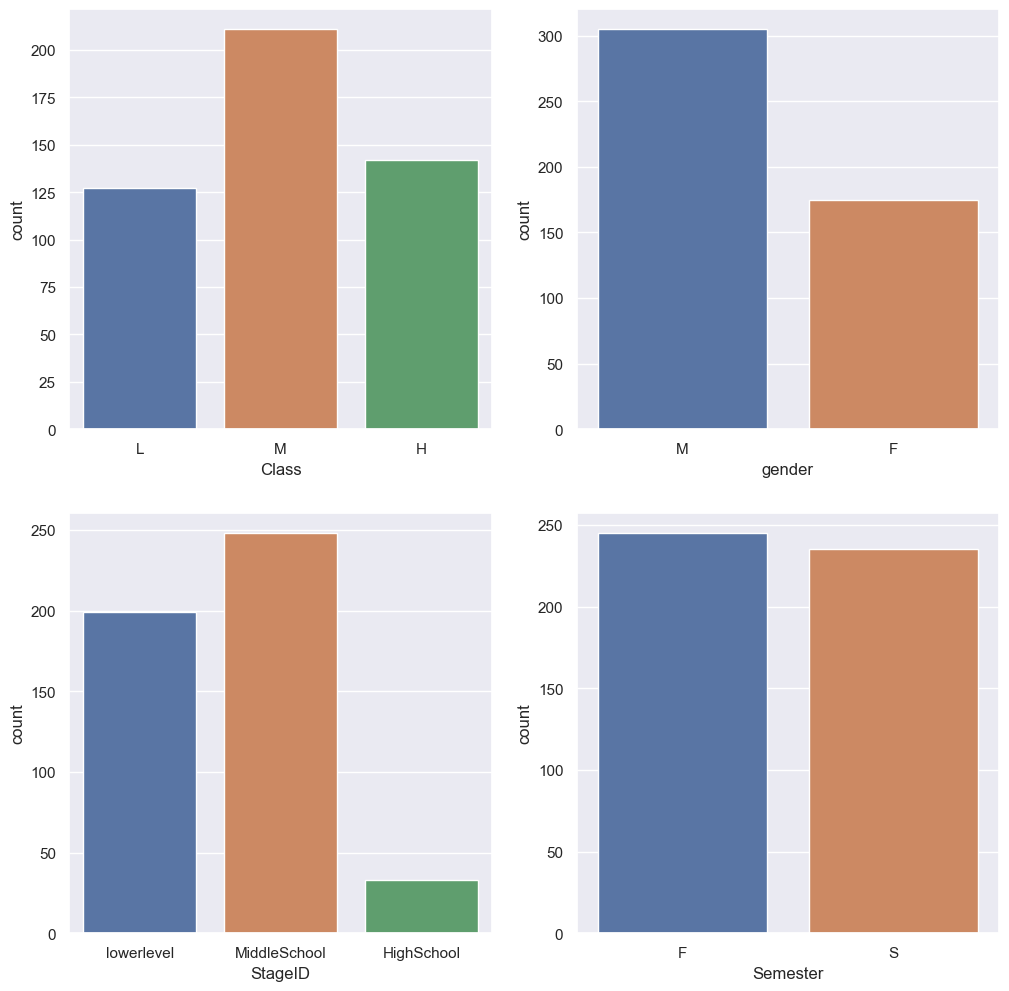

In [13]:
fig,axarr=plt.subplots(2,2,figsize=(12,12))
sns.countplot(x="Class",data=df,ax=axarr[0,0],order=['L','M','H'])
sns.countplot(x="gender",data=df,ax=axarr[0,1],order=['M','F'])
sns.countplot(x="StageID",data=df,ax=axarr[1,0])
sns.countplot(x="Semester",data=df,ax=axarr[1,1])
plt.show()

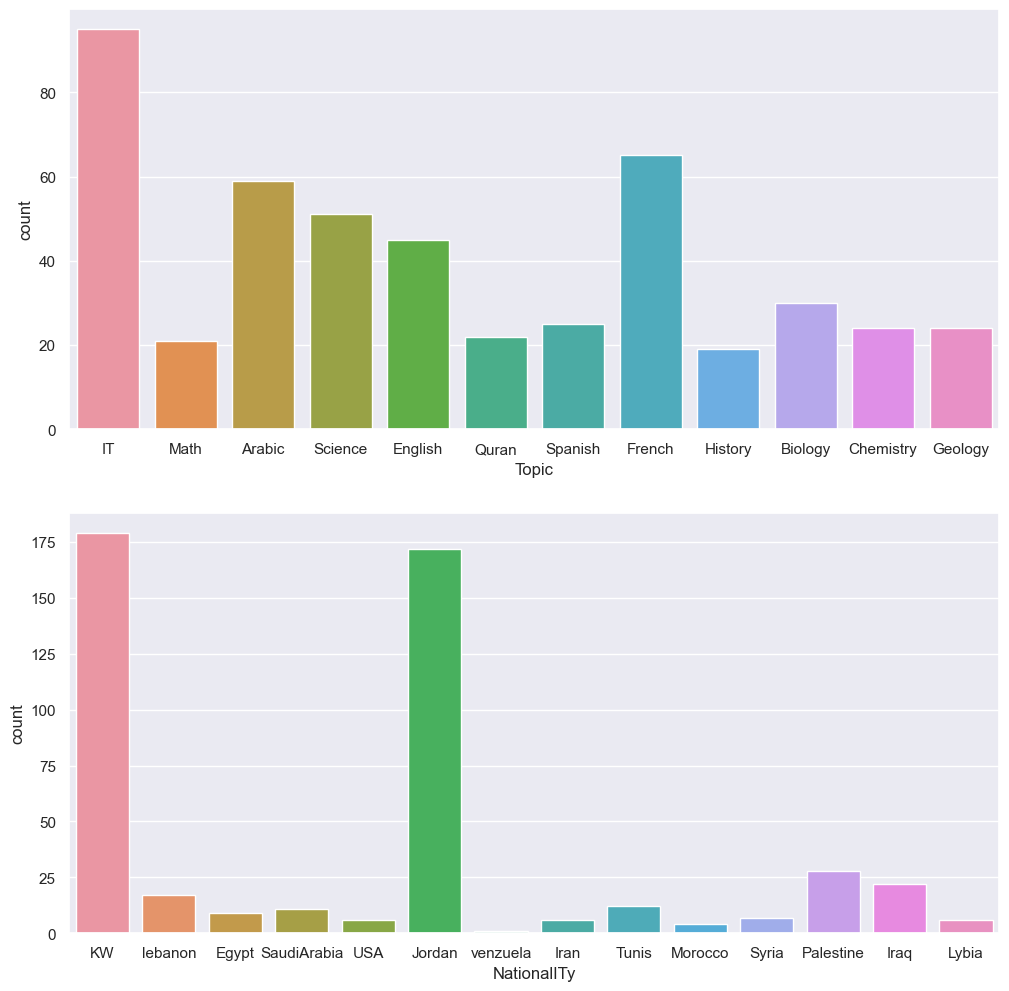

In [16]:
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(12,12))
sns.countplot(x="Topic",data=df,ax=axis1)
sns.countplot(x="NationalITy",data=df,ax=axis2)
plt.show()

### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

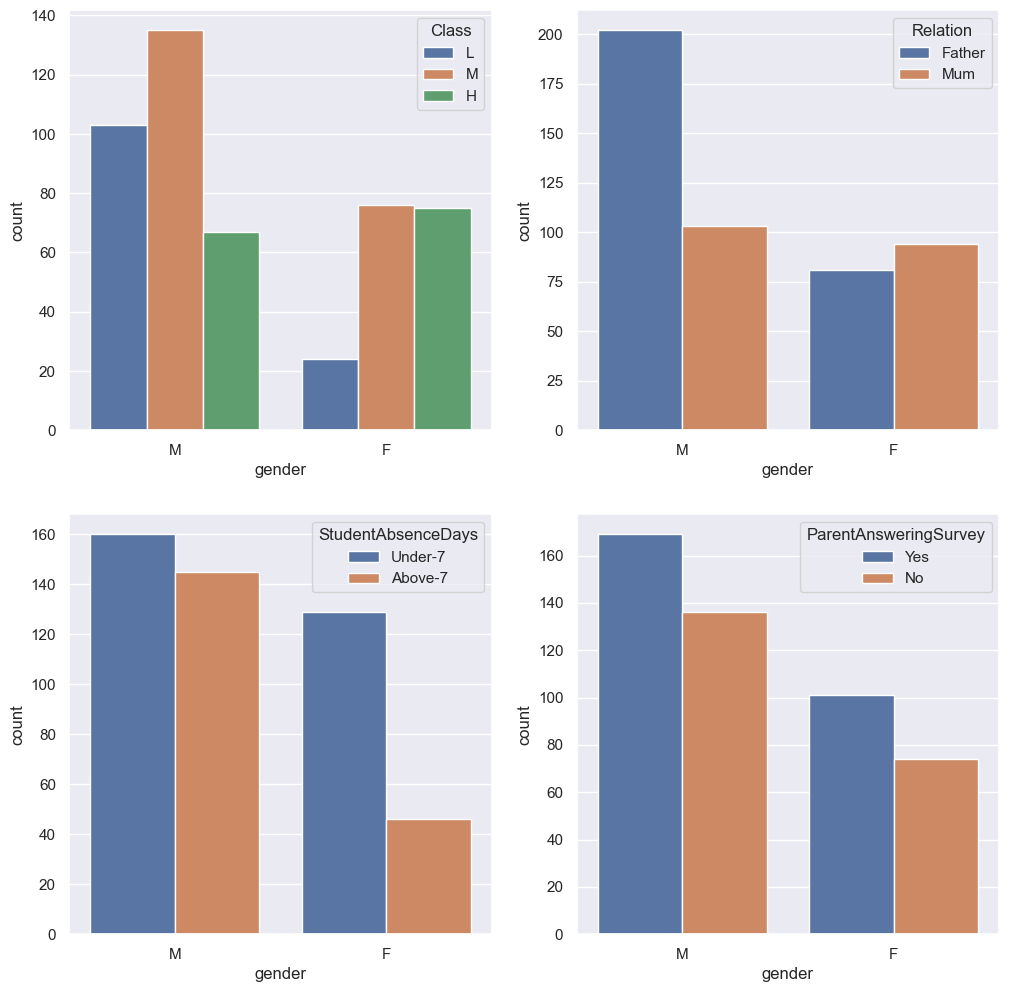

In [17]:
fig, axarr=plt.subplots(2,2,figsize=(12,12))
sns.countplot(x='gender',hue='Class',data=df,ax=axarr[0,0],order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender',hue='Relation',data=df,ax=axarr[0,1],order=['M','F'])
sns.countplot(x='gender',hue='StudentAbsenceDays',data=df,ax=axarr[1,0],order=['M','F'])
sns.countplot(x='gender',hue='ParentAnsweringSurvey',data=df,ax=axarr[1,1],order=['M','F'])
plt.show()

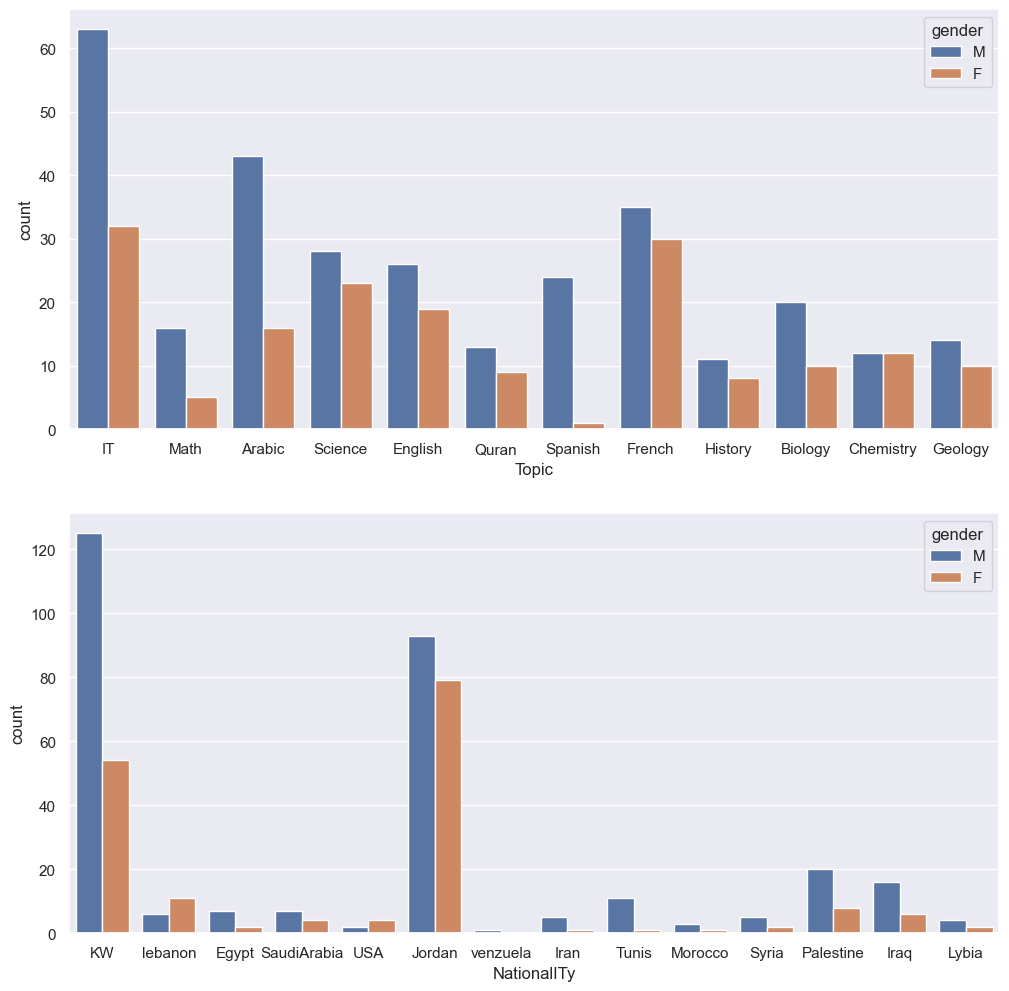

In [18]:
fig,(axis1, axis2)=plt.subplots(2, 1,figsize=(12,12))
sns.countplot(x='Topic',hue='gender',data=df,ax=axis1)
sns.countplot(x='NationalITy',hue='gender',data=df,ax=axis2)
plt.show()

### 3. Visualize categorical variables with numerical variables and give conclusions?

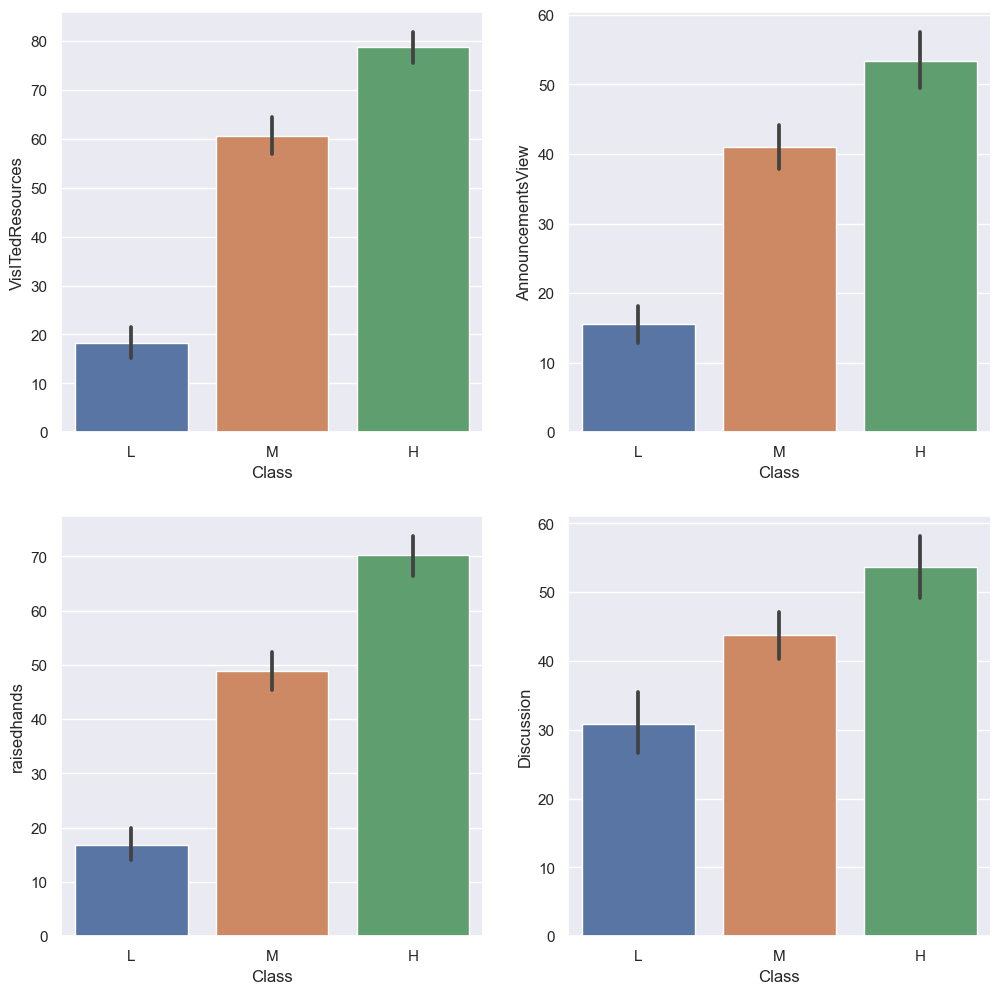

In [19]:
fig,axarr=plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Class',y='VisITedResources',data=df,order=['L','M','H'],ax=axarr[0,0])
sns.barplot(x='Class',y='AnnouncementsView',data=df,order=['L','M','H'],ax=axarr[0,1])
sns.barplot(x='Class',y='raisedhands',data=df,order=['L','M','H'],ax=axarr[1,0])
sns.barplot(x='Class',y='Discussion',data=df,order=['L','M','H'],ax=axarr[1,1])
plt.show()

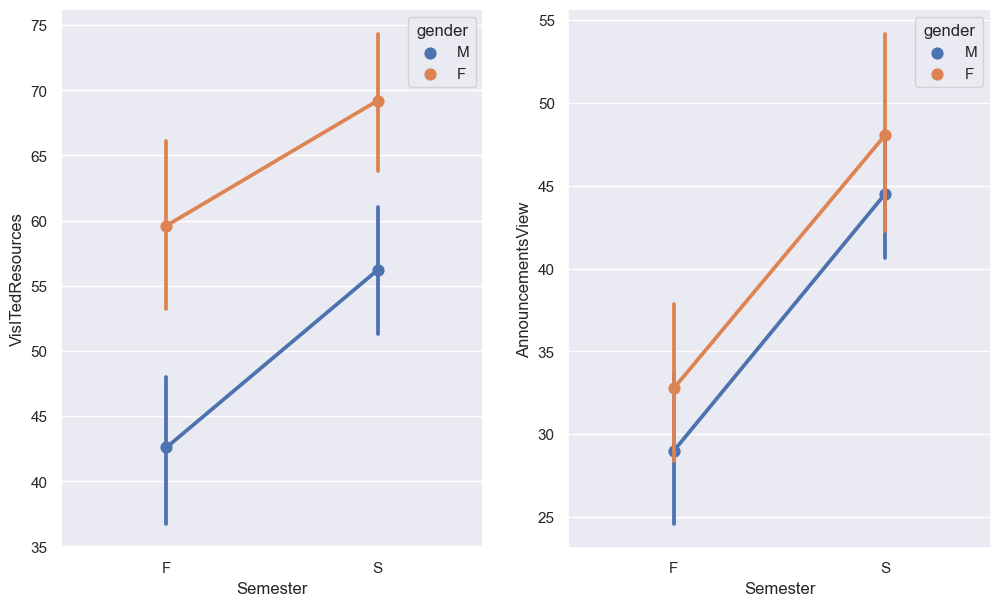

In [20]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(12,7))
sns.pointplot(x='Semester',y='VisITedResources',hue='gender',data=df,ax=axis1)
sns.pointplot(x='Semester',y='AnnouncementsView',hue='gender',data=df,ax=axis2)
plt.show()

In [21]:
ave_raisedhands=sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources=sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
unsuccess =df.loc[(df['raisedhands'] >= ave_raisedhands) & (df['VisITedResources']>=ave_VisITedResources) & (df['AnnouncementsView']>=ave_AnnouncementsView)  & (df['Class'] == 'L')]


In [22]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


### 4. From the above result, what are the factors that leads to get low grades of the students?

In [ ]:
from above result factors leads to low grades of student are 
1- they are absent more than 7 days
2-they have feature of raisehands,visitedresources,accouncementview greater than average

### 5. Build classification model and present it's classification report ?

In [23]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [24]:
df1=df.drop('Class',axis=1)
df_with_dummies=pd.get_dummies(df1,drop_first=True)

In [25]:
df_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [78]:
columns=['VisITedResources']
x=df_with_dummies.drop(columns,axis=1)
y=df_with_dummies[columns]

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)


StandardScaler()

In [80]:
X = scaler.fit_transform(x)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)


In [82]:
LogM = LogisticRegression()
LogM.fit(x_train,y_train)

LogisticRegression()

In [83]:
Prediction = LogM.predict(x_test)
Score=accuracy_score(y_test,Prediction)
Report=classification_report(y_test,Prediction)

In [85]:
Prediction

array([60, 12, 51, 29, 90, 28, 90, 20, 26, 20, 82, 80, 78, 88, 12, 81, 80,
       12, 12, 82, 20, 70, 80, 60, 88, 98, 90, 89, 82,  7, 81, 12, 90, 90,
       20, 90, 82, 90, 80, 63, 60, 80, 82, 82, 80, 12, 90, 90, 10, 21, 82,
       75, 78, 12, 90, 60, 89, 12, 90, 80, 79, 91, 98, 80, 75, 98, 88, 90,
        7, 80,  2, 12, 81, 17, 80, 88, 90, 90, 82, 82, 75, 80, 88, 40,  5,
       90, 80, 71, 80, 88, 60, 90, 90, 70, 81, 90, 22, 82,  2,  5, 41, 88,
       90, 20, 82, 82, 63, 89, 12, 84, 60, 22, 80, 20, 80, 76, 20, 80, 81,
       82, 82, 78, 80, 80, 80, 80, 20, 80,  2,  2, 89, 70, 87, 60, 79, 90,
       89, 80, 60, 80, 80, 97, 75, 82], dtype=int64)

In [87]:
Score

0.041666666666666664

In [89]:
print(Report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         3
          22       0.00    